<a href="https://colab.research.google.com/github/sayarghoshroy/Neural_and_Cognitive_Modelling/blob/master/Bayesian_Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $Introduction\ to\ Neural\ and\ Cognitive\ Modelling$

# $Assignment\ 4$

# $Sayar\ Ghosh\ Roy\ (20171047)$

## $For\ best\ viewing\ experience,\ use\ Google\ Colab$ 
# [*Click Here*](https://colab.research.google.com/drive/1P-E1I1g6nS8PcqdeMobY6XN3SUohtrF4)

# $Solution\ to\ Part\ 1$

$m = r(S) + n$

$\implies m = 10 + \frac{50}{1\ +\ exp\big(-\frac{S\ -\ 0.25}{0.15}\big) }\ +\ n$

$where\ p(n)\ =\ \frac{1}{\sqrt{2\pi}(5)}.exp\bigg(-\frac{n^2}{2(5)^2}\bigg)$

$i.e\ p(n) \approx G(\mu = 0,\ \sigma = 5)$

$We\ have:$

$\frac{50}{1\ +\ exp\big(-\frac{S\ -\ 0.25}{0.15}\big) }\ =\ m\ -\ n\ -\ 10$

$\implies 1\ +\ exp\big(-\frac{S\ -\ 0.25}{0.15}\big)\ =\ \frac{50}{m\ -\ n\ - 10}$

$\implies exp\big(-\frac{S\ -\ 0.25}{0.15}\big)\ =\ \frac{50}{m\ -\ n\ - 10}\ -\ 1$

$\implies -\frac{S\ -\ 0.25}{0.15} = ln(\frac{50}{m\ -\ n\ - 10}\ -\ 1)$ 

$\implies\ S\ =\ \frac{25}{100}\ -\ \frac{15}{100}ln(\frac{50}{m\ -\ n\ - 10}\ -\ 1)$

$if\ we\ set\ m\ =\ 58,\ we\ get:$

$S\ =\ \frac{25}{100}\ -\ \frac{15}{100}.ln(\frac{50}{48\ -\ n}\ -\ 1)$

$Now,\ S \in\ [0,\ 1]$

$To\ compute\ n\ from\ S:$

$n\ =\ m\ -\ 10\ -\ \frac{50}{1\ +\ exp\big(-\frac{S\ -\ 0.25}{0.15}\big) }$

$and\ with\ m\ set\ to\ 58,$

$n\ =\ 48\ -\ \frac{50}{1\ +\ exp\big(-\frac{S\ -\ 0.25}{0.15}\big) }$

$We\ have\ a\ Gaussian\ model\ for\ p(n).\ Every\ S\ gives\ us\ a\ unique\ n.\ Thus,\ we\ can\ estimate\ L(S; m)\ as:$

$\frac{1}{\sqrt{2\pi}(5)}.exp\Bigg(\frac{-1}{2(5)^2}\bigg(m\ -\ 10\ -\ \frac{50}{1\ +\ exp\big(-\frac{S\ -\ 0.25}{0.15}\big) }\bigg)^2\Bigg)$

$-\ We\ use\ the\ above\ relation\ to\ obtain\ L(S; 58)$

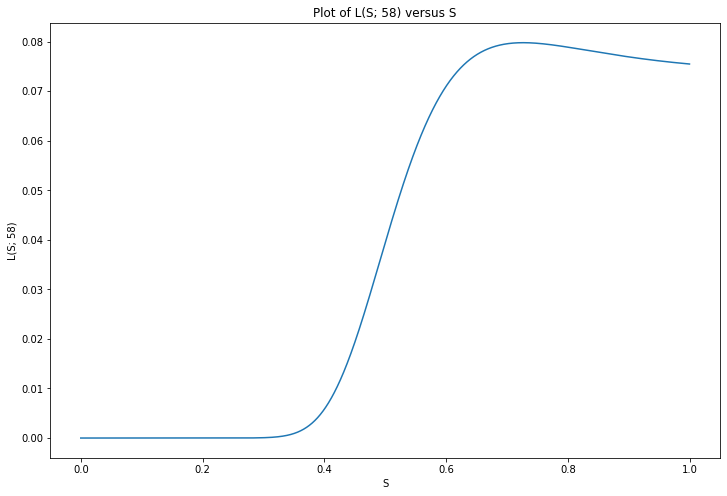

In [1]:
import numpy as np
import matplotlib.pyplot as plt

size = 10000
# Number of values used for plotting and estimations

def L(s, m):
    # Estimate the Likelihood L(S; m)
    calc = np.power((m - 10 - 50 / (1 + np.exp(- (s - 0.25) / 0.15))), 2) * (-1 / 50)
    return (1 / (5 * np.sqrt(2 * np.pi))) * np.exp(calc)

S_values = [(i / size) for i in range(size)]
L_values = [L(s, 58) for s in S_values]

fig = plt.figure(figsize=(12,8))
plt.xlabel('S')
plt.ylabel('L(S; 58)')
plt.title("Plot of L(S; 58) versus S")
plt.plot(S_values, L_values)
plt.show()

# $Solution\ to\ Part\ 2$

$For\ ease\ of\ representation,\ let\ us\ define\ a\ few\ terms:$

- $A\ =\ \frac{-1}{2(5)^2}\bigg(m\ -\ 10\ -\ \frac{50}{1\ +\ exp\big(-\frac{S\ -\ 0.25}{0.15}\big)} \bigg)^2$

- $B\ =\ \bigg(m\ -\ 10\ -\ \frac{50}{1\ +\ exp\big(-\frac{S\ -\ 0.25}{0.15}\big)} \bigg)$

- $C\ =\ {1\ +\ exp\big(-\frac{S\ -\ 0.25}{0.15}\big)}$

$To\ estimate\ maximum\ likelihood,\ we\ differentiate\ p(S)\ w.r.t\ \ p:$

$\therefore\ p'(s)\ =\ \frac{1}{\sqrt{2\pi}(5)}.exp(A).\Big(\frac{-1}{2(5)^2}\Big).2.B.\frac{+50}{C^2}.\bigg(exp\Big(-\frac{S-0.25}{0.15}\Big)\bigg).\frac{-S}{0.15}$

$Now,\ we\ equate\ p'(s)\ to\ 0\ to\ obtain\ critical\ points:$

$p'(s)\ =\ 0$

$\implies B\ =\ 0\ or\ S\ =\ 0$

$Note\ that:\ B\ =\ 0 \implies A\ =\ 0$

$And:\ exp(A),\ \frac{50}{C^2},\ exp\Big(-\frac{S-0.25}{0.15}\Big)\ \neq\ 0$

$Now,\ S = 0\ is\ a\ boundary\ point\ and\ L(0;\ 58) \approx 0$

$Hence,$

$B = 0$

$\implies \bigg(m\ -\ 10\ -\ \frac{50}{1\ +\ exp\big(-\frac{S^*\ -\ 0.25}{0.15}\big)} \bigg) = 0$

$\implies \frac{50}{1\ +\ exp\big(-\frac{S^*\ -\ 0.25}{0.15}\big)} = m - 10$

$\implies 1\ +\ exp\big(-\frac{S^*\ -\ 0.25}{0.15}\big) = \frac{50}{m-10}$

$\implies exp\big(-\frac{S^*\ -\ 0.25}{0.15}\big) = \frac{50}{m-10} - 1$

$\implies -\frac{S^*\ -\ 0.25}{0.15} = ln\Big(\frac{50}{m-10} - 1 \Big)$

$\implies S^* = -\frac{15}{100}.ln\Big(\frac{50}{m-10} - 1 \Big) + \frac{25}{100}$

In [2]:
def get_S_optima(m):
    return -0.15 * np.log(50/(m - 10) - 1) + 0.25

def get_maximum_likelihood(m):
    return L(get_S_optima(m), m)

best_S = get_S_optima(58)
best_ML = get_maximum_likelihood(58)

print("S* = " + str(best_S))
print("L* = " + str(best_ML))

S* = 0.7267080745521916
L* = 0.07978845608028655


$Setting\ m\ =\ 58:$

$S^* = -\frac{15}{100}.ln\Big(\frac{50}{48} - 1 \Big) + \frac{25}{100} = 0.72670807455$

$-\ is\ the\ required\ S\ that\ maximizes\ L(S;\ 58)$

$We\ verify\ using:$

- $Estimating\ from\ the\ plot\ of\ L\ versus\ S$

- $Iteratively\ checking\ computed\ L\ values\ to\ get\ an\ estimate\ of\ which\ S\ maximizes\ L$

In [3]:
# Iteratively Checking L values to find which S maximizes L

def get_best_S_approx():
    position = np.argmax(np.asarray(L_values))
    return (position / size)

S_best_approx = get_best_S_approx()

print("An Approximation to S* using computed values: S*_approx = " + str(S_best_approx))

An Approximation to S* using computed values: S*_approx = 0.7267


$-\ Clearly,\ everything\ checks\ out\ and \rightarrow$

$S^*\ =\ 0.7267,\ L^*\ =\ 0.0798\ are\ optimum\ values\ for\ S\ and\ L\ respectively.$

# $Thank\ \ You$